In [138]:
import pandas as pd

df1 = pd.read_csv("global_inflation_countries.csv")  
print(df.head())  


  country_code country_name           region     sub_region  \
0          Afg   Afganistan  ASIA MERIDIONAL  Southern Asia   
1          Afg   Afganistan  ASIA MERIDIONAL  Southern Asia   
2          Afg   Afganistan  ASIA MERIDIONAL  Southern Asia   
3          Afg   Afganistan  ASIA MERIDIONAL  Southern Asia   
4          Afg   Afganistan  ASIA MERIDIONAL  Southern Asia   

                               indicator_name  year  inflation_rate  
0  Inflacion, Precios Al Consumidor (% Anual)  1960             0.0  
1  Inflacion, Precios Al Consumidor (% Anual)  1961             0.0  
2  Inflacion, Precios Al Consumidor (% Anual)  1962             0.0  
3  Inflacion, Precios Al Consumidor (% Anual)  1963             0.0  
4  Inflacion, Precios Al Consumidor (% Anual)  1964             0.0  


In [139]:
df.shape

(13760, 7)

In [140]:
df.columns

Index(['country_code', 'country_name', 'region', 'sub_region',
       'indicator_name', 'year', 'inflation_rate'],
      dtype='object')

In [141]:
df.dtypes

country_code       object
country_name       object
region             object
sub_region         object
indicator_name     object
year                int32
inflation_rate    float64
dtype: object

In [142]:
print(df.isnull().sum())

country_code      0
country_name      0
region            0
sub_region        0
indicator_name    0
year              0
inflation_rate    0
dtype: int64


In [143]:
# Drop columns 'intermediate_region' and 'indicator_code'
df = df1.drop(columns=['intermediate_region', 'indicator_code'])

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns 'intermediate_region' and 'indicator_code':")
print(df)


DataFrame after dropping columns 'intermediate_region' and 'indicator_code':
      country_code country_name  \
0              AFG   AFGANISTAN   
1              AFG   AFGANISTAN   
2              AFG   AFGANISTAN   
3              AFG   AFGANISTAN   
4              AFG   AFGANISTAN   
...            ...          ...   
13755          ZWE     ZIMBABWE   
13756          ZWE     ZIMBABWE   
13757          ZWE     ZIMBABWE   
13758          ZWE     ZIMBABWE   
13759          ZWE     ZIMBABWE   

                                                  region          sub_region  \
0                                        ASIA MERIDIONAL       SOUTHERN ASIA   
1                                        ASIA MERIDIONAL       SOUTHERN ASIA   
2                                        ASIA MERIDIONAL       SOUTHERN ASIA   
3                                        ASIA MERIDIONAL       SOUTHERN ASIA   
4                                        ASIA MERIDIONAL       SOUTHERN ASIA   
...                  

In [144]:
print(df.isnull().sum())

country_code         0
country_name         0
region            5440
sub_region           0
indicator_name       0
year                 0
inflation_rate       0
dtype: int64


In [145]:
# Fill missing values in 'region' column with the mode of the 'sub_region' column
df["region"] = df.groupby("sub_region")["region"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [146]:
print(df.isnull().sum())

country_code         0
country_name         0
region            1728
sub_region           0
indicator_name       0
year                 0
inflation_rate       0
dtype: int64


In [147]:
missing_regions = df[df["region"].isnull()]["sub_region"].unique()
print("Sub-regions with missing regions:", missing_regions)


Sub-regions with missing regions: ['WESTERN EUROPE' 'AUSTRALIA AND NEW ZEALAND' 'NORTHERN AMERICA'
 'NORTHERN EUROPE']


In [148]:
sub_region_to_region = {
    "WESTERN EUROPE": "EUROPE",
    "AUSTRALIA AND NEW ZEALAND": "OCEANIA",
    "NORTHERN AMERICA": "AMERICAS",
    "NORTHERN EUROPE": "EUROPE"
}
df["region"] = df["region"].fillna(df["sub_region"].map(sub_region_to_region))


In [149]:
print(df.isnull().sum())

country_code      0
country_name      0
region            0
sub_region        0
indicator_name    0
year              0
inflation_rate    0
dtype: int64


In [150]:
print(f"Duplicate rows: {df.duplicated().sum()}")  # Count duplicate rows


Duplicate rows: 0


In [151]:

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [152]:
df["year"] = df["year"].astype(int)


In [153]:
df["inflation_rate"] = pd.to_numeric(df["inflation_rate"], errors="coerce")
#change type to float


In [154]:
categorical_cols = [
    "country_code", "country_name", "region", "sub_region", 
     "indicator_name"
]

df[categorical_cols] = df[categorical_cols].astype(str)  # Ensure all are strings

# Remove extra spaces and standardize case
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())
#Ensure all values are stored as strings
#Remove extra spaces
#Convert to Title Case (e.g., "afghanistan" → "Afghanistan")

In [155]:
print(df.dtypes)

country_code       object
country_name       object
region             object
sub_region         object
indicator_name     object
year                int32
inflation_rate    float64
dtype: object


In [156]:
df["country_name"] = df["country_name"].str.title().str.strip()  # Capitalize & remove spaces
df["region"] = df["region"].str.upper()  # Convert to uppercase for uniformity
df["sub_region"] = df["sub_region"].str.title().str.strip()  # Capitalize & remove spaces
df["indicator_name"] = df["indicator_name"].str.title().str.strip()  # Capitalize & remove spaces


In [157]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['inflation_rate'].quantile(0.25)
Q3 = df['inflation_rate'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['inflation_rate'] < lower_bound) | (df['inflation_rate'] > upper_bound)]

# Display the outliers
print("\nOutliers in the 'inflation_rate' column:")
print(outliers)


Outliers in the 'inflation_rate' column:
      country_code country_name  \
48             Afg   Afganistan   
96             Alb      Albania   
97             Alb      Albania   
98             Alb      Albania   
101            Alb      Albania   
...            ...          ...   
13693          Zmb       Zambia   
13755          Zwe     Zimbabwe   
13756          Zwe     Zimbabwe   
13757          Zwe     Zimbabwe   
13758          Zwe     Zimbabwe   

                                                  region          sub_region  \
48                                       ASIA MERIDIONAL       Southern Asia   
96       EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)     Southern Europe   
97       EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)     Southern Europe   
98       EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)     Southern Europe   
101      EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)     Southern Europe   
...                                                  ... 

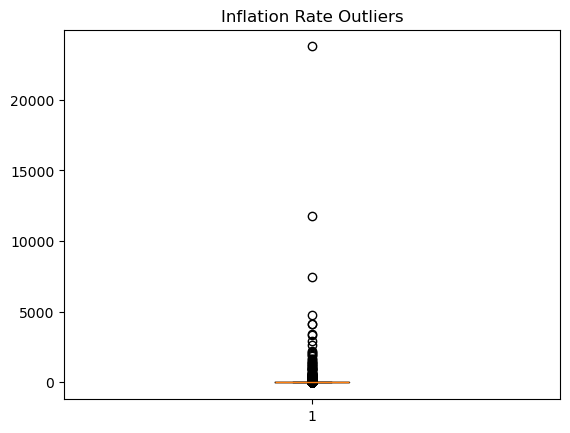

In [158]:
#to detect outliers in the 'inflation_rate' column
import matplotlib.pyplot as plt

plt.boxplot(df["inflation_rate"].dropna())  # Box plot to detect outliers
plt.title("Inflation Rate Outliers")
plt.show()


In [159]:
df1.sample(5)  # Display a random sample of 15 rows

,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
3436,DMA,DOMINICA,AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS ING...,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2004,2.394110
333,ATG,ANTIGUA Y BARBUDA,NaN,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1973,0.000000
13427,VUT,VANUATU,ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS IN...,MELANESIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2011,0.873793
719,AUS,AUSTRALIA,NaN,AUSTRALIA AND NEW ZEALAND,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1975,15.162455
7176,KWT,KUWAIT,NaN,WESTERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1968,0.000000


In [160]:
df1["country_code"].value_counts()

country_code
AFG    64
MNG    64
MOZ    64
MMR    64
NAM    64
       ..
GRD    64
GRC    64
GRL    64
GUM    64
ZWE    64
Name: count, Length: 215, dtype: int64

In [161]:
!pip install pycountry
import pycountry

# Function to convert to ISO-2 country codes
def convert_to_iso2(code):
    try:
        country = pycountry.countries.lookup(code)
        return country.alpha_2  # Convert to ISO-2
    except LookupError:
        return None  # Handle invalid codes

# Apply function
df1['country_code_fixed'] = df1['country_code'].apply(convert_to_iso2)

print(df1)


      country_code country_name  \
0              AFG   AFGANISTAN   
1              AFG   AFGANISTAN   
2              AFG   AFGANISTAN   
3              AFG   AFGANISTAN   
4              AFG   AFGANISTAN   
...            ...          ...   
13755          ZWE     ZIMBABWE   
13756          ZWE     ZIMBABWE   
13757          ZWE     ZIMBABWE   
13758          ZWE     ZIMBABWE   
13759          ZWE     ZIMBABWE   

                                                  region          sub_region  \
0                                        ASIA MERIDIONAL       SOUTHERN ASIA   
1                                        ASIA MERIDIONAL       SOUTHERN ASIA   
2                                        ASIA MERIDIONAL       SOUTHERN ASIA   
3                                        ASIA MERIDIONAL       SOUTHERN ASIA   
4                                        ASIA MERIDIONAL       SOUTHERN ASIA   
...                                                  ...                 ...   
13755  ÁFRICA AL SU

In [162]:
import pandas as pd

df2 = pd.read_csv("global_inflation_organizations.csv")  
print(df2.head()) 

       country_name country_code region income_group  \
0   INGRESO MEDIANO          MIC    NaN    AGREGADOS   
1   INGRESO MEDIANO          MIC    NaN    AGREGADOS   
2   INGRESO MEDIANO          MIC    NaN    AGREGADOS   
3   INGRESO MEDIANO          MIC    NaN    AGREGADOS   
4   INGRESO MEDIANO          MIC    NaN    AGREGADOS   

                               indicator_name  indicator_code  year  \
0  INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)  FP.CPI.TOTL.ZG  1960   
1  INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)  FP.CPI.TOTL.ZG  1961   
2  INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)  FP.CPI.TOTL.ZG  1962   
3  INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)  FP.CPI.TOTL.ZG  1963   
4  INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)  FP.CPI.TOTL.ZG  1964   

   inflation_rate  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [163]:
df2.shape

(3264, 8)

In [164]:
df2.columns

Index(['country_name', 'country_code', 'region', 'income_group',
       'indicator_name', 'indicator_code', 'year', 'inflation_rate'],
      dtype='object')

In [165]:
df2.dtypes

country_name       object
country_code       object
region             object
income_group       object
indicator_name     object
indicator_code     object
year                int64
inflation_rate    float64
dtype: object

In [166]:
print(df2.isnull().sum())

country_name       128
country_code         0
region            3200
income_group         0
indicator_name       0
indicator_code       0
year                 0
inflation_rate       0
dtype: int64


In [167]:
code_to_country = df2[['country_code', 'country_name']].dropna().drop_duplicates().set_index('country_code')['country_name'].to_dict()
# Create a dictionary mapping country codes to country names

In [168]:
df2['country_name'] = df2['country_name'].fillna(df2['country_code'].map(code_to_country))
# Fill missing country names using the dictionary

In [169]:
region_to_country = df2.groupby('region')['country_name'].agg(lambda x: x.value_counts().index[0])


In [170]:
df2['country_name'] = df2['country_name'].fillna(df2['region'].map(region_to_country))


In [171]:
print(df2.isnull().sum())

country_name       128
country_code         0
region            3200
income_group         0
indicator_name       0
indicator_code       0
year                 0
inflation_rate       0
dtype: int64


In [172]:
# Check for missing values in the 'country_name' column
missing_values_count = df2['country_name'].isnull().sum()
print(f"Missing values in 'country_name' column: {missing_values_count}")

Missing values in 'country_name' column: 128


In [173]:
#Since df2["country_name"] contains world organizations instead of country names, let's rename it
df2.rename(columns={"country_name": "global_organization", "country_code": "organization_code"}, inplace=True)


In [175]:
print(df_countries.head()) 
print(df_countries.shape)  


  region_or_indicator region_code region income_group  \
0     Ingreso Mediano         MIC    NaN    AGREGADOS   
1     Ingreso Mediano         MIC    NaN    AGREGADOS   
2     Ingreso Mediano         MIC    NaN    AGREGADOS   
3     Ingreso Mediano         MIC    NaN    AGREGADOS   
4     Ingreso Mediano         MIC    NaN    AGREGADOS   

                               indicator_name  indicator_code  year  \
0  Inflacion, Precios Al Consumidor (% Anual)  FP.CPI.TOTL.ZG  1960   
1  Inflacion, Precios Al Consumidor (% Anual)  FP.CPI.TOTL.ZG  1961   
2  Inflacion, Precios Al Consumidor (% Anual)  FP.CPI.TOTL.ZG  1962   
3  Inflacion, Precios Al Consumidor (% Anual)  FP.CPI.TOTL.ZG  1963   
4  Inflacion, Precios Al Consumidor (% Anual)  FP.CPI.TOTL.ZG  1964   

   inflation_rate  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
(3264, 8)


In [177]:
print(df1.columns)  # Columns in first dataset
print(df2.columns)  # Columns in second dataset

Index(['country_code', 'country_name', 'region', 'sub_region',
       'intermediate_region', 'indicator_code', 'indicator_name', 'year',
       'inflation_rate', 'country_code_fixed'],
      dtype='object')
Index(['global_organization', 'organization_code', 'region', 'income_group',
       'indicator_name', 'indicator_code', 'year', 'inflation_rate'],
      dtype='object')


In [178]:
df1["year"] = df1["year"].astype(int)
df2["year"] = df2["year"].astype(int)


In [185]:
df1["region"].value_counts()

region
ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRESOS)           3008
AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS INGRESOS)         1472
ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS INGRESOS)        1408
EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)              1088
ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTOS INGRESOS)     832
ASIA MERIDIONAL                                               512
Name: count, dtype: int64

In [186]:
df2["region"].value_counts()

region
EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)    64
Name: count, dtype: int64

In [190]:
df1.drop(columns=['intermediate_region'], inplace=True)

In [193]:
df1["indicator_name"].value_counts()


indicator_name
INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)    13760
Name: count, dtype: int64

In [195]:

df2["indicator_name"].value_counts()

indicator_name
INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)    3264
Name: count, dtype: int64

In [200]:
df1.drop(columns=["indicator_name"], inplace=True)
df2.drop(columns=["indicator_name"], inplace=True)


In [201]:
df1["indicator_code"].value_counts()

indicator_code
FP.CPI.TOTL.ZG    13760
Name: count, dtype: int64

In [202]:
df2["indicator_code"].value_counts()

indicator_code
FP.CPI.TOTL.ZG    3264
Name: count, dtype: int64

In [203]:
df1.drop(columns=["indicator_code"], inplace=True)
df2.drop(columns=["indicator_code"], inplace=True)


In [207]:
df1["year"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [208]:
df1["year"].value_counts()

year
1960    215
1961    215
1994    215
1995    215
1996    215
       ... 
1986    215
1987    215
1988    215
1989    215
2023    215
Name: count, Length: 64, dtype: int64

In [ ]:
df1["year"].nunique()

64

In [210]:
df2["year"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [205]:
df2["year"].value_counts()

year
1960    51
1961    51
1994    51
1995    51
1996    51
        ..
1986    51
1987    51
1988    51
1989    51
2023    51
Name: count, Length: 64, dtype: int64

In [211]:
df2["year"].nunique()

64